# Leitura de bibliotecas e arquivos


In [1]:
# importação de bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# leitura dos arquivos

rain = pd.read_csv('https://docs.google.com/spreadsheets/d/1V9ESykkZvs5NCE6EnyMjn3lhp4UQN2A4kHLoLDRycgI/export?format=csv')

wind_1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1yKPK2K29QdIeFcD7aVaQH4f-dDmJzMNpJ4HXpLrZ46I/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_2 = pd.read_csv('https://docs.google.com/spreadsheets/d/1a-xyMNP8TwbDnR4TiYuoFdbOyxu3YgflJW4Wort3_M8/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_3 = pd.read_csv('https://docs.google.com/spreadsheets/d/1GXkAQtncMFm8k5DjcgLaGAKIl2KBm-HsTOp6qkknu-I/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_4 = pd.read_csv('https://docs.google.com/spreadsheets/d/1YHjkgxlO0NRzHYFfnjQKEbsSIZN0Zo7A-dd2evFG-4c/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_5 = pd.read_csv('https://docs.google.com/spreadsheets/d/1BRjTeQ2cSRBbUDXD-J75AaVW8DoWFkelDTVy2gCC8V8/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_6 = pd.read_csv('https://docs.google.com/spreadsheets/d/1Zw0_Q4KUwJH7iS6D6yG5dJM4MVUjnh57bVURhX8xR0c/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_7 = pd.read_csv('https://docs.google.com/spreadsheets/d/19mEEo13n83_tEavgQz4RqjCXSyz7mzgo-a9cqW0VGUM/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind_8 = pd.read_csv('https://docs.google.com/spreadsheets/d/1oLogYpx_q2GmM6HtL079P0_nkAdvI7TXizPp47kCZ5I/export?format=csv', names = ['date', 'location', 'gustdir', 'gustspeed', 'dir9am', 'dir3pm', 'speed9am', 'speed3pm'])
wind = pd.concat([wind_1, wind_2, wind_3, wind_4, wind_5, wind_6, wind_7, wind_8])

# Análise exploratória de 'rain'

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [5]:
rain.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,141871.000000,138583.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,28.505419,61.991179,10.014164,10.000748,0.227804
std,6.403283,7.117618,8.465173,4.188537,3.781525,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,10.237506,26.649111,3.169832,4.997908,0.272764
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,-3.760000,2.000000,0.000000,-17.739346,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,22.520000,44.000000,8.000000,6.650238,0.030055
50%,12.000000,22.600000,0.000000,4.800000,8.500000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,28.520000,63.200000,10.000000,10.000009,0.100853
75%,16.800000,28.200000,0.800000,7.400000,10.600000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,35.480000,80.000000,12.000000,13.389306,0.329507
max,33.900000,48.100000,371.000000,145.000000,14.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,59.720000,122.000000,26.000000,32.478590,0.999400


In [6]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

# Limpeza e normalização

In [7]:
# transformação de variáveis categóricas em numéricas

dummy_rain = pd.get_dummies(rain, columns = ['raintoday', 'raintomorrow'], drop_first = True)

In [8]:
# normalização dos dados

scaler = StandardScaler()
norm_rain1 = scaler.fit_transform(dummy_rain[['mintemp', 'maxtemp', 'rainfall', 'evaporation','sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm','cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp','humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente']])
norm_rain = pd.DataFrame(norm_rain1)
norm_rain.columns = ('mintemp', 'maxtemp', 'rainfall', 'evaporation','sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm','cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp','humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente')
norm_rain['date'] = dummy_rain['date']
norm_rain['location'] = dummy_rain['location']
norm_rain['raintoday_Yes'] = dummy_rain['raintoday_Yes']
norm_rain['raintomorrow_Yes'] = dummy_rain['raintomorrow_Yes']

In [9]:
norm_rain.isnull().sum()

mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
amountOfRain            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
date                    0
location                0
raintoday_Yes           0
raintomorrow_Yes        0
dtype: int64

# Identificação de correlações

In [10]:
norm_rain.corr().T

# sunshine:-0.450768 (67816 nulls), cloud3pm: 0.381870 (57094 nulls), humidity3pm: 0.446160 (3610 nulls), humidity: 0.405600 (3610 nulls) 

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_16760\3592309098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  norm_rain.corr().T


,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,raintoday_Yes,raintomorrow_Yes
mintemp,1.000000,0.736267,0.104255,0.467261,0.072961,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743,0.584512,0.004145,0.001300,-0.001554,0.134768,0.055743,0.083936
maxtemp,0.736267,1.000000,-0.074839,0.588915,0.469967,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208,0.794183,-0.463989,0.001191,-0.000918,-0.235871,-0.226715,-0.159237
rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557,-0.059987,0.232724,-0.002410,-0.002792,0.361186,0.500997,0.239032
evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498,0.465288,-0.355983,0.004543,-0.002419,-0.164926,-0.187281,-0.119285
sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973,0.369367,-0.571486,-0.003830,0.003155,-0.639583,-0.328709,-0.450768
humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417,-0.400695,0.606853,-0.001347,0.002721,0.393754,0.351251,0.257161
humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183,-0.404326,0.908871,-0.000707,0.000464,0.662753,0.375806,0.446160
pressure9am,-0.451260,-0.332293,-0.168085,-0.269907,0.040959,0.139519,-0.027449,1.000000,0.961348,-0.130081,-0.148139,-0.422773,-0.287301,-0.163673,-0.261068,-0.025464,-0.001760,0.001572,-0.361402,-0.188643,-0.246371
pressure3pm,-0.461623,-0.427279,-0.126728,-0.293160,-0.020464,0.186955,0.051840,0.961348,1.000000,-0.061152,-0.084963,-0.470325,-0.389863,-0.164184,-0.335831,0.046812,-0.001651,0.001973,-0.316223,-0.105660,-0.226031
cloud9am,0.077625,-0.289865,0.198195,-0.185032,-0.675610,0.452182,0.517037,-0.130081,-0.061152,1.000000,0.604118,-0.137843,-0.302520,0.198095,-0.227987,0.469853,-0.001553,0.000611,0.475929,0.303900,0.317380


# Modelo inicial e eliminação de dados vazados

<Axes: xlabel='raintomorrow_Yes', ylabel='amountOfRain'>

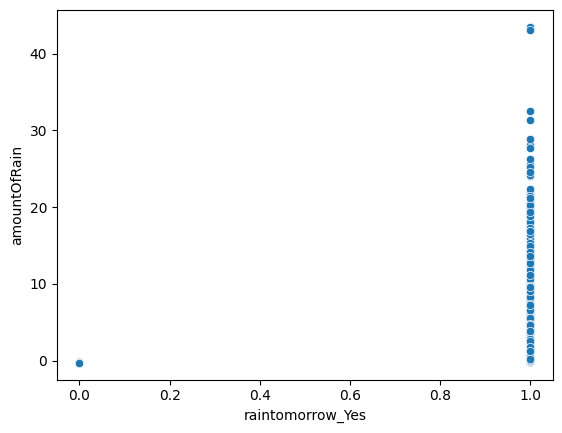

In [11]:
# Modelo 1

# separação treino X teste

X = norm_rain[['amountOfRain']]
y = norm_rain['raintomorrow_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# regressão logística e checagem de escore

model = LogisticRegression()
model.fit(x_train, y_train)
accuracy_score(y_test, model.predict(x_test))

# acurácia 0.9999437396269937:'amountOfRain' deve ser eliminada por vazamento de dados

sns.scatterplot(data=norm_rain, x ='raintomorrow_Yes', y = 'amountOfRain') 

In [12]:
norm_rain.drop(['amountOfRain', 'modelo_vigente'], axis = 1, inplace = True)

# Outros modelos

In [13]:
# Modelo 2

# eliminação de 3610 nulls de humidity3pm

norm_rain.dropna(subset = ['humidity3pm'], inplace = True) 

# separação treino X teste

X = norm_rain[['humidity3pm']]
y = norm_rain['raintomorrow_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# regressão logística

model = LogisticRegression()
model.fit(x_train, y_train)

# checagem de escore 

accuracy_score(y_test, model.predict(x_test))
accuracy_score(y_train, model.predict(x_train))

# acurácia treino: 0.826077335308889
# acurácia teste: 0.824510766033597

0.826077335308889

In [14]:
# nova contagem de nulos 

norm_rain.isnull().sum()

mintemp               337
maxtemp               137
rainfall             1297
evaporation         58847
sunshine            64781
humidity9am           676
humidity3pm             0
pressure9am         12800
pressure3pm         12636
cloud9am            52486
cloud3pm            53786
temp9am               543
temp3pm                 0
temp                  137
humidity                0
precipitation3pm        0
precipitation9am        0
date                    0
location                0
raintoday_Yes           0
raintomorrow_Yes        0
dtype: int64

In [15]:
# nova correlação

norm_rain.corr()

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_16760\801921834.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  norm_rain.corr()


,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes
mintemp,1.000000,0.733760,0.105597,0.469891,0.071925,-0.237858,0.005999,-0.449162,-0.458147,0.080263,0.020430,0.901132,0.708938,0.581839,0.004145,0.001361,-0.001610,0.058219,0.086896
maxtemp,0.733760,1.000000,-0.074579,0.593863,0.468914,-0.509422,-0.509270,-0.329135,-0.422522,-0.286321,-0.278375,0.885824,0.984534,0.793354,-0.463989,0.001844,-0.000685,-0.225964,-0.157179
rainfall,0.105597,-0.074579,1.000000,-0.067232,-0.228084,0.223317,0.255312,-0.167180,-0.126161,0.197579,0.171890,0.011436,-0.078411,-0.059931,0.232724,-0.003227,-0.002910,0.500825,0.237321
evaporation,0.469891,0.593863,-0.067232,1.000000,0.366068,-0.508477,-0.392785,-0.269824,-0.292785,-0.185245,-0.184414,0.548755,0.575604,0.468288,-0.355983,0.004737,-0.002542,-0.188917,-0.118580
sunshine,0.071925,0.468914,-0.228084,0.366068,1.000000,-0.491763,-0.629122,0.042499,-0.018866,-0.675458,-0.704184,0.289966,0.489326,0.368123,-0.571486,-0.004115,0.003464,-0.329325,-0.451460
humidity9am,-0.237858,-0.509422,0.223317,-0.508477,-0.491763,1.000000,0.667388,0.141163,0.188194,0.453052,0.357960,-0.477368,-0.499838,-0.403509,0.606853,-0.001836,0.002060,0.350938,0.256194
humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,-0.404326,0.908871,-0.000707,0.000464,0.375806,0.446160
pressure9am,-0.449162,-0.329135,-0.167180,-0.269824,0.042499,0.141163,-0.027449,1.000000,0.961566,-0.132403,-0.148308,-0.420330,-0.286621,-0.258202,-0.025464,-0.001603,0.001544,-0.189775,-0.245482
pressure3pm,-0.458147,-0.422522,-0.126161,-0.292785,-0.018866,0.188194,0.051840,0.961566,1.000000,-0.065587,-0.085489,-0.466315,-0.388928,-0.331663,0.046812,-0.001661,0.002113,-0.107537,-0.226111
cloud9am,0.080263,-0.286321,0.197579,-0.185245,-0.675458,0.453052,0.517037,-0.132403,-0.065587,1.000000,0.603388,-0.134901,-0.301578,-0.225721,0.469853,-0.002031,-0.000171,0.302264,0.317010


In [16]:
# Modelo 3: inclusão de mais variáveis em regressão logística

# separação treino X teste

X = norm_rain[['humidity3pm', 'humidity','raintoday_Yes', 'temp3pm']]
y = norm_rain['raintomorrow_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# regressão logística

model = LogisticRegression()
model.fit(x_train, y_train)

# checagem de escore 

accuracy_score(y_train, model.predict(x_train))
accuracy_score(y_test, model.predict(x_test))

# acurácia treino: 0.8301663507701781
# acurácia teste: 0.8285804999134099

0.8285804999134099

In [17]:
# Modelo 4: ensemble

# separação treino X teste

X = norm_rain[['humidity3pm', 'humidity','raintoday_Yes', 'temp3pm']]
y = norm_rain['raintomorrow_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# stacking

forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
logistic = LogisticRegression()
bagging = BaggingClassifier()
stacking = StackingClassifier(classifiers=[tree, forest, knn, bagging, logistic], meta_classifier=LogisticRegression(), use_probas=True, average_probas=True)
stacking.fit(x_train, y_train)

print(roc_auc_score(y_train,stacking.predict_proba(x_train)[:, 1]))
print(roc_auc_score(y_test,stacking.predict_proba(x_test)[:, 1]))
# roc auc score treino: 0.9202274856198922
# roc auc score teste: 0.7695853218273887

0.9202312127903501
0.7694469617147415


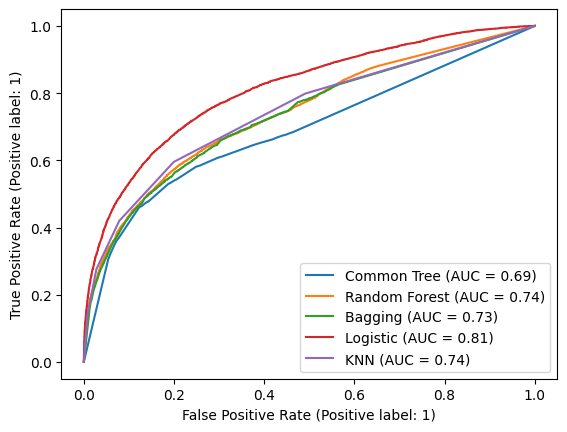

In [18]:
curva = roc_curve(y_train,stacking.predict_proba(x_train)[:, 1])
plot_curva = RocCurveDisplay(fpr = curva[0], tpr = curva[1])

tree.fit(x_train, y_train)
forest.fit(x_train, y_train)
bagging.fit(x_train, y_train)
logistic.fit(x_train, y_train)
knn.fit(x_train, y_train)
stacking.fit(x_train, y_train)

fig, ax = plt.subplots()
plot_curva.from_estimator(tree, x_test, y_test, name='Common Tree', ax=ax)
plot_curva.from_estimator(forest, x_test, y_test, name='Random Forest', ax=ax)
plot_curva.from_estimator(bagging, x_test, y_test, name='Bagging', ax=ax)
plot_curva.from_estimator(logistic, x_test, y_test, name='Logistic', ax=ax)
plot_curva.from_estimator(knn, x_test, y_test, name='KNN', ax=ax)
fpr, tpr, thrs = roc_curve(y_test, stacking.predict_proba(x_test)[:, 1])
plt.legend()

# Melhor auc = regressão logística. Manutenção do modelo anterior. 

# Modelo final

In [19]:
# Modelo 5: regressão logística por locais e sem 'rainfall'

# eliminação dos nulos de 'rainfall' (1297)

norm_rain.dropna(subset = ['rainfall'], inplace = True) 

# criação de grupos de locais com base na média das umidades

grupos_umidade = norm_rain.groupby('location').agg({'humidity' : 'mean'})
locais_umidade = pd.cut(grupos_umidade['humidity'], bins = 4, labels = ('0', '1', '2','3'))
locais_umidade = locais_umidade.to_dict()
norm_rain['locais_umidade'] = norm_rain['location'].map(locais_umidade)

# regressões logísticas para grupos de locais com base na média das umidades

dict_umid = {}
dict_ac = {}
lista_umid = norm_rain['locais_umidade'].unique()

for x in lista_umid:
    rain_umid = norm_rain[norm_rain['locais_umidade'] == x] 
    X = rain_umid[['humidity3pm', 'humidity','raintoday_Yes', 'temp3pm', 'rainfall']]
    y = rain_umid['raintomorrow_Yes']
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    dict_umid[x] = model
    ac_train = accuracy_score(y_train, model.predict(x_train))
    ac_test = accuracy_score(y_test, model.predict(x_test))
    dict_ac[x] = (ac_train, ac_test)

In [20]:
def previsao(data, dict_cat):
    return dict_cat[data['locais_umidade']].predict_proba(pd.DataFrame(data[['humidity3pm', 'humidity','raintoday_Yes', 'temp3pm', 'rainfall']]).T)[0,1]

norm_rain['previsao/umid_local'] = norm_rain.apply(previsao, axis = 1, dict_cat = dict_umid) 

In [21]:
dict_ac

{'2': (0.8319222944149111, 0.8293739335870849),
 '0': (0.931958762886598, 0.9335137224584461),
 '3': (0.7808315991990262, 0.7810365135453474),
 '1': (0.8671273363027099, 0.8691308691308691)}

ValueError: Found input variables with inconsistent numbers of samples: [137286, 0]

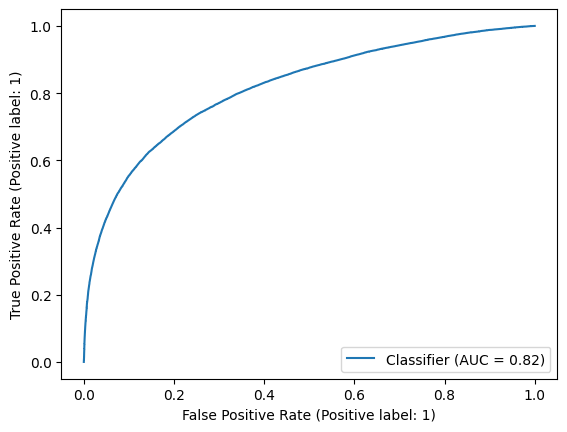

In [106]:
# verificar gráfico da curva roc

fig, ax = plt.subplots()
a = norm_rain['raintomorrow_Yes']
b = norm_rain['previsao/umid_local']
c = norm_rain[norm_rain['previsao/umid_local'] == '0']['previsao/umid_local']
d = norm_rain[norm_rain['previsao/umid_local'] == '1']['previsao/umid_local']
e = norm_rain[norm_rain['previsao/umid_local'] == '2']['previsao/umid_local']
f = norm_rain[norm_rain['previsao/umid_local'] == '3']['previsao/umid_local']
plot_curva = RocCurveDisplay.from_predictions(a, b, ax = ax)
plot_curva = RocCurveDisplay.from_predictions(a, c, ax = ax)

# Análise exploratória de 'wind'

In [26]:
wind.drop(index = 0, axis = 0, inplace = True)

In [36]:
wind.head()

,date,location,gustdir,gustspeed,dir9am,dir3pm,speed9am,speed3pm,locais_umidade
1,2007-11-01,Canberra,NW,30,SW,NW,6,20,1
2,2007-11-02,Canberra,ENE,39,E,W,4,17,1
3,2007-11-03,Canberra,NW,85,N,NNE,6,6,1
4,2007-11-04,Canberra,NW,54,WNW,W,30,24,1
5,2007-11-05,Canberra,SSE,50,SSE,ESE,20,28,1


In [29]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 1 to 22193
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       164386 non-null  object
 1   location   164386 non-null  object
 2   gustdir    153808 non-null  object
 3   gustspeed  153868 non-null  object
 4   dir9am     152958 non-null  object
 5   dir3pm     159551 non-null  object
 6   speed9am   162933 non-null  object
 7   speed3pm   160803 non-null  object
dtypes: object(8)
memory usage: 11.3+ MB


In [83]:
# junção com o dataframe de chuva

wind_rain = pd.merge(norm_rain, wind, on = ('date','location'))
wind_rain.drop_duplicates(inplace = True)

In [84]:
wind_rain

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,date,location,raintoday_Yes,raintomorrow_Yes,locais_umidade_x,previsao/umid_local,gustdir,gustspeed,dir9am,dir3pm,speed9am,speed3pm,locais_umidade_y
0,0.189528,-0.045912,-0.206727,NaN,NaN,0.113179,-1.417590,-1.400863,-1.159388,1.234088,NaN,-0.013478,0.016254,0.095197,-1.260504,0.626482,-0.977490,2008-12-01,Albury,0,0,2,0.018536,W,44,W,WNW,20,24,2
1,-0.747494,0.263181,-0.277606,NaN,NaN,-1.304053,-1.273343,-0.992725,-1.059908,NaN,NaN,0.032727,0.376611,0.353074,-2.243333,-0.004468,2.300241,2008-12-02,Albury,0,0,2,0.022531,WNW,44,NNW,WSW,4,22,2
2,0.111443,0.347479,-0.277606,NaN,NaN,-1.618994,-1.032932,-1.414937,-0.932007,NaN,-0.920073,0.617989,0.218054,0.423403,-0.900265,2.203859,2.157332,2008-12-03,Albury,0,0,2,0.032528,WSW,46,W,WSW,19,26,2
3,-0.466387,0.670622,-0.277606,NaN,NaN,-1.251563,-1.706083,-0.007566,-0.349343,NaN,NaN,0.171342,0.693725,0.693001,-1.530682,-0.635419,0.405751,2008-12-04,Albury,0,0,2,0.013027,NE,24,SE,E,11,9,2
4,0.829827,1.274759,-0.159474,NaN,NaN,0.690569,-0.888685,-0.964578,-1.315712,0.887707,1.285309,0.125137,1.154982,1.197032,-0.765176,-0.319944,0.376719,2008-12-05,Albury,0,0,2,0.044541,W,41,ENE,NW,7,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137281,-1.356559,-0.200459,-0.277606,NaN,NaN,-0.516702,-1.177179,0.991667,0.844407,NaN,NaN,-1.168601,-0.113474,-0.033741,-1.035355,0.626482,-0.830764,2017-06-20,Uluru,0,0,0,0.018613,E,31,ESE,E,15,13,0
137282,-1.465878,0.024336,-0.277606,NaN,NaN,-0.936623,-1.321425,0.977594,0.716505,NaN,NaN,-1.060789,0.102740,0.153806,-1.170444,-0.004468,-0.669656,2017-06-21,Uluru,0,0,0,0.017112,E,31,SE,ENE,13,11,0
137283,-1.340942,0.291280,-0.277606,NaN,NaN,-0.674172,-1.465672,0.822783,0.545970,NaN,NaN,-0.937576,0.405440,0.376517,-1.305533,-0.319944,1.943866,2017-06-22,Uluru,0,0,0,0.017052,NNW,22,SE,N,13,9,0
137284,-1.059835,0.516076,-0.277606,NaN,NaN,-0.831643,-1.321425,0.470940,0.219109,NaN,NaN,-0.691150,0.636068,0.564063,-1.170444,0.626482,-1.803800,2017-06-23,Uluru,0,0,0,0.028075,N,37,SE,WNW,9,9,0


In [85]:
wind_rain.to_csv('wind_rain.csv')